In [119]:
import preliz as pz
from matplotlib import pyplot as plt

In [120]:
%matplotlib widget

In [118]:
plt.gcf().clear()
pz.Beta(10,10).plot_interactive(kind='pdf',xy_lim='auto',interval='hdi',)
#plt.show()

interactive(children=(FloatSlider(value=10.0, description='alpha (0, inf)', max=110.0, min=2.220446049250313e-…

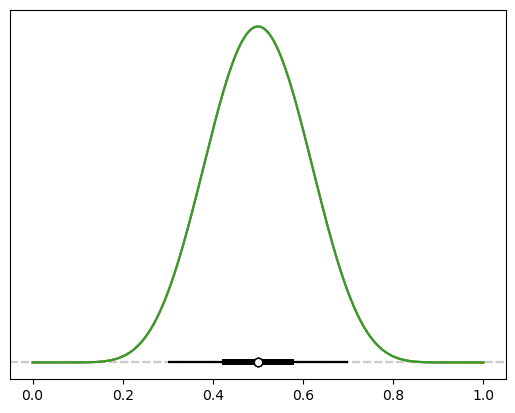

In [13]:
plt.show()

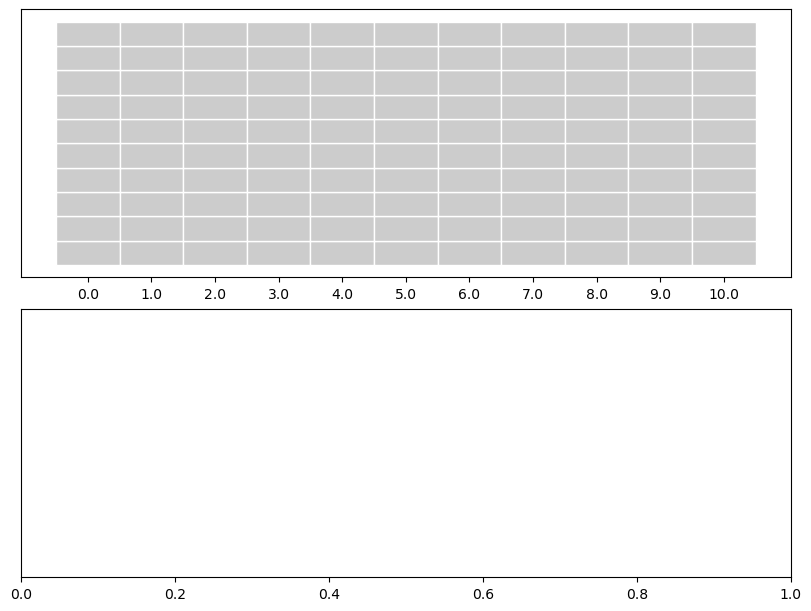

In [5]:
pz.roulette()

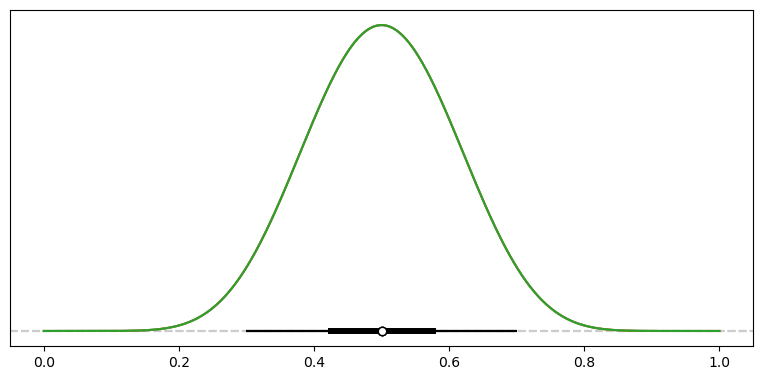

Beta(mean=0.6, median=0.6, std=0.08, lower=0.45, upper=0.74)

In [123]:
prob_frown=pz.Beta(alpha=24, beta=16)
plt.show()
prob_frown.summary()

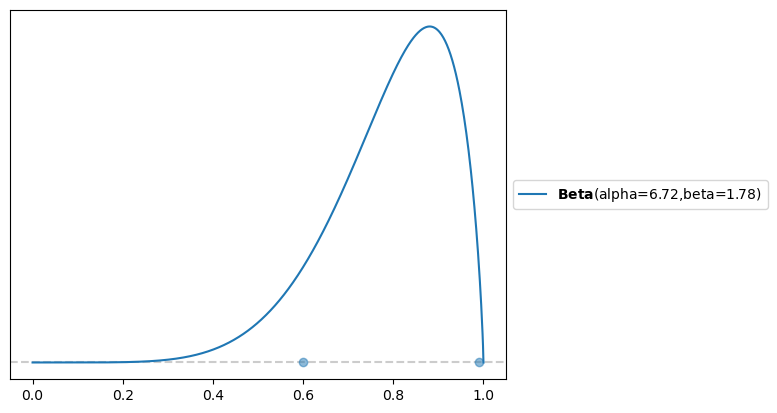

Beta(alpha=6.72,beta=1.78)

In [124]:
plt.close()
prob_smile= pz.Beta()
pz.maxent(prob_smile, lower=.60, upper=.99, mass=.90,);
plt.show()
prob_smile



In [121]:
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr
import blackjax


In [9]:
import lux

In [125]:

smiles = pm.BetaBinomial.dist(alpha=prob_smile.alpha,beta=prob_smile.beta, n=10, shape=100)
print(smiles.eval())
frowns = pm.BetaBinomial.dist(alpha=prob_frown.alpha, beta=prob_frown.beta, n=10-smiles, shape=100)
print(frowns.eval())

print((smiles+frowns).eval())

[ 9  8 10  7  4  2  8 10  9  9  9 10  5  9  9  9  7  9 10  8  3  9  9  6
  7  8  7  9  8  5  7 10  8  8  8  9  9 10  9  7  9  9  8 10  9  9 10  6
  8  9  9  7  7  9 10 10  7 10 10  9  4  9 10  5  8 10  9  5  5  7  6  7
  9  9  9  8  9  9  2  9  8  9  8  9 10  9  4  6 10  6  6 10  8  7  8  8
  9  7  7  5]
[1 1 0 2 6 6 1 0 0 0 1 0 3 0 1 1 2 1 0 0 4 1 1 1 2 2 1 1 1 1 2 0 1 2 1 0 1
 0 1 3 1 1 1 0 1 1 0 2 2 1 1 1 3 1 0 0 1 0 0 1 3 1 0 5 2 0 1 4 2 0 1 2 1 1
 0 2 0 1 7 0 2 0 2 0 0 1 3 2 0 2 2 0 1 3 1 0 1 2 2 3]
[10  9 10  9 10  8  9 10  9  9 10 10  8  9 10 10  9 10 10  8  7 10 10  7
  9 10  8 10  9  6  9 10  9 10  9  9 10 10 10 10 10 10  9 10 10 10 10  8
 10 10 10  8 10 10 10 10  8 10 10 10  7 10 10 10 10 10 10  9  7  7  7  9
 10 10  9 10  9 10  9  9 10  9 10  9 10 10  7  8 10  8  8 10  9 10  9  8
 10  9  9  8]


In [11]:



# FILEPATH: /home/wmbelk74/repositories/wmbelk-git/preliz_try.ipynb
datetime = pd.to_datetime((np.arange(0, 100) * 10) + 222, unit='s')  # Convert seconds to datetime

lat_seed = np.linspace(-90, 90, 1)  # example latitude values
lon_seed = np.linspace(-180, 180, 1)  # example longitude values
altitude_seed = np.linspace(0, 1000, 1)  # example altitude values
coord_stack=[lat_seed,lon_seed,altitude_seed]
# Generate random differences between each successive data point
differences = np.random.rand(100,3)

# Calculate the cumulative sum of the differences to get the final values
coord_add_values = np.cumsum(differences, axis=0)
coord_stack+=coord_add_values.T
(lat,lon,altitude)=coord_stack

butterfly_flight = xr.DataArray(
    np.array([smiles.eval(),frowns.eval()]),  # example random data with differences
    dims=['expression', "time", ],
    coords={'expression': ["smiles","frowns"],"time": datetime, "lat": ('time', lat), "lon": ('time',lon), "altitude": ('time',altitude)},
)
butterfly_flight

<xarray.DataArray (expression: 2, time: 100)>
array([[ 8,  9, 10,  9,  8,  8,  9,  9,  7, 10, 10, 10,  8,  7, 10,  7,
         9,  7, 10,  8, 10,  7,  4,  8,  7,  8,  8,  8,  7,  8,  6,  9,
         4,  9,  8,  7,  7,  8, 10,  8,  5, 10,  9,  9,  8,  8, 10,  9,
         8,  7,  6,  8,  9,  4,  9,  8,  5,  5,  9,  9,  8,  9,  5,  9,
         3,  9, 10,  9,  9, 10,  9,  5,  5,  9,  8,  8,  8,  8,  9,  9,
         5,  7,  9,  6,  7,  7, 10,  6,  6,  7,  8, 10,  9,  6, 10,  7,
         6, 10,  3,  6],
       [ 2,  1,  0,  1,  1,  2,  0,  1,  3,  0,  0,  0,  2,  1,  0,  1,
         1,  3,  0,  1,  0,  2,  4,  0,  0,  2,  2,  2,  2,  1,  1,  0,
         5,  1,  0,  3,  3,  1,  0,  1,  4,  0,  1,  1,  2,  2,  0,  0,
         1,  2,  3,  1,  1,  5,  0,  2,  5,  3,  0,  0,  1,  1,  3,  1,
         2,  1,  0,  1,  1,  0,  1,  3,  4,  0,  1,  1,  1,  1,  1,  0,
         4,  1,  1,  3,  3,  2,  0,  3,  3,  0,  2,  0,  1,  4,  0,  1,
         1,  0,  5,  4]])
Coordinates:
  * expression  (expression) <U6 'smiles' 'frowns'
  * time        (time) datetime64[ns] 1970-01-01T00:03:42 ... 1970-01-01T00:2...
    lat         (time) float64 -89.31 -89.11 -88.46 ... -41.73 -40.83 -40.76
    lon         (time) float64 -179.4 -179.2 -178.6 ... -132.1 -131.4 -131.1
    altitude    (time) float64 0.9026 1.888 2.04 2.594 ... 54.27 54.77 55.38

In [4]:

def convert_coords_to_pymc(dataset):
    return {i:ii.values for (i,ii) in dataset.coords.items() if isinstance(ii, xr.DataArray)}

# Example usage:
pymc_coords = convert_coords_to_pymc(butterfly_flight)



NameError: name 'butterfly_flight' is not defined

In [13]:
with pm.Model(coords=convert_coords_to_pymc(butterfly_flight)) as dim_import_test:
    data_smiles = pm.Data('smiles_obs',butterfly_flight['expression'=='smiles'],mutable=True,infer_dims_and_coords=True, dims='time')
    data_frowns = pm.Data('frowns_obs',butterfly_flight['expression'=='frowns'],mutable=True,infer_dims_and_coords=True, dims='time')
    smile_alpha = pm.HalfCauchy('smile_alpha', beta=prob_smile.alpha)
    smile_beta = pm.HalfCauchy('smile_beta', beta=prob_smile.beta)
    frown_alpha = pm.HalfCauchy('frown_alpha', beta=prob_frown.alpha)
    frown_beta = pm.HalfCauchy('frown_beta', beta=prob_frown.beta)


    smiles = pm.BetaBinomial('smiles', alpha=smile_alpha, beta=smile_beta, n=10, observed=data_smiles, dims='time')
    frowns = pm.BetaBinomial('frowns', alpha=frown_alpha, beta=frown_beta, n=10, observed=data_frowns, dims='time')

    trace = pm.sample(1000, tune=1000, cores=1, chains=1, return_inferencedata=True,nuts_sampler='blackjax')

    


Compiling...
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
/home/wmbelk74/anaconda3/envs/Pymc_py311/lib/python3.11/site-packages/pymc/sampling/jax.py:454: UserWarning: BlackJax currently only display progress bar correctly under `chain_method == 'vectorized'`. Setting `progressbar=False`.
  warnings.warn(
Compilation time = 0:00:01.171506
Sampling...
Sampling time = 0:00:06.274041
Transforming variables...
Transformation time = 0:00:00.087830


In [117]:
smiles.eval().shape()

NameError: name 'smiles' is not defined

In [15]:
butterfly_flight.to_dataframe(name='smiles'
                                                ).reset_index()


/home/wmbelk74/anaconda3/envs/Pymc_py311/lib/python3.11/site-packages/lux/executor/PandasExecutor.py:555: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
/home/wmbelk74/anaconda3/envs/Pymc_py311/lib/python3.11/site-packages/lux/executor/PandasExecutor.py:574: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
import math

def degrees_to_radians(degrees):
    radians = math.radians(degrees)
    return radians


In [110]:
#alternative bee flight profile creation using pymc model as generative model

time_line = pd.to_datetime((np.arange(0, 10) * 10) + 222, unit='s')  # Convert seconds to datetime
with pm.Model(coords={'time':time_line}) as flight_gen:
    #create constant data variables for lat, lon, altitude
    Lat_start = pm.Data('Lat_start',-45,mutable=False)#degrees_to_radians(
    Lon_start = pm.Data('Lon_start',45,mutable=False)#degrees_to_radians(
    Alt_start = pm.Data('Alt_start',1000,mutable=False)
    #use pymc to create a gaussian walk values for lat, lon, altitude
    Lat = pm.GaussianRandomWalk('Lat',mu=1, sigma=1, init_dist = pm.Normal.dist(Lat_start,1), dims=['time'])
    Lon = pm.GaussianRandomWalk('Lon',mu=0, sigma=1, init_dist = pm.Normal.dist(Lon_start,1), dims=['time'])
    Alt = pm.GaussianRandomWalk('Alt',mu=0, sigma=10, init_dist = pm.Normal.dist(Alt_start,1), dims=['time'])
    idata = pm.sample_prior_predictive(1, random_seed=42)
    




Sampling: [Alt, Lat, Lon]


In [111]:

def calculate_heading_pitch(lat, lon, alt, return_in_radians=False):
    # Convert latitude and longitude from degrees to radians
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)

    # Calculate the differences in latitude, longitude, and altitude
    delta_lat = lat_rad.diff('time', label='lower')  # label='lower' uses the lower time value to label the difference
    delta_lon = lon_rad.diff('time',label='lower')
    delta_alt = alt.diff('time',label='lower')

    # Calculate the heading (azimuth) from point A to point B
    heading = np.arctan2(np.sin(delta_lon) * np.cos(lat_rad), np.cos(lat_rad) * np.sin(lat_rad) - np.sin(lat_rad) * np.cos(lat_rad) * np.cos(delta_lon))

    # Calculate the pitch (elevation) from point A to point B
    pitch = np.arctan2(delta_alt, np.sqrt(delta_lat**2 + delta_lon**2))

    if return_in_radians:
        return heading, pitch
    else:
        return np.degrees(heading), np.degrees(pitch)
    



In [112]:
heading_to_next, pitch_to_next = calculate_heading_pitch(  idata.prior.Lat.squeeze(),idata.prior.Lon.squeeze(),idata.prior.Alt.squeeze())
display(heading_to_next)
display(pitch_to_next)

<xarray.DataArray (time: 9)>
array([ 90.45612191,  90.21714349, -90.4594827 , -90.37048368,
        90.45674713, -90.77555309,  90.30736203,  90.47037921,
       -90.00156993])
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T00:03:42 ... 1970-01-01T00:05:02
    chain    int64 0
    draw     int64 0

<xarray.DataArray 'Alt' (time: 9)>
array([-86.22149843, -89.80393641, -89.86791359,  89.84662405,
       -87.60846585, -89.7881436 ,  89.80136656,  87.28996053,
       -89.84173468])
Coordinates:
    chain    int64 0
    draw     int64 0
  * time     (time) datetime64[ns] 1970-01-01T00:03:42 ... 1970-01-01T00:05:02

In [113]:

def calculate_new_point(lat, lon, alt, heading, pitch, distance):
    # Convert latitude and longitude from degrees to radians
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)

    # Convert heading and pitch from degrees to radians
    heading_rad = np.radians(heading)
    pitch_rad = np.radians(pitch)

    # Earth radius in meters
    earth_radius = 6371000

    # Calculate the change in latitude and longitude
    delta_lat = np.degrees( (distance * np.cos(pitch_rad) * np.sin(heading_rad)) / earth_radius )
    delta_lon = np.degrees( (distance * np.cos(pitch_rad) * np.cos(heading_rad)) / (earth_radius * np.cos(lat_rad)) )
    delta_alt = distance * np.sin(pitch_rad)

    # Calculate the new latitude, longitude, and altitude
    new_lat = lat + delta_lat
    new_lon = lon + delta_lon
    new_alt = alt + delta_alt

    return new_lat, new_lon, new_alt, delta_lat, delta_lon, delta_alt

# Example usage:
lat = xr.DataArray([45], dims='time')
lon = xr.DataArray([90], dims='time')
alt = xr.DataArray([1000], dims='time')
heading = xr.DataArray([30], dims='time')
pitch = xr.DataArray([15], dims='time')
distance = 100

new_lat, new_lon, new_alt ,_,_,_= calculate_new_point(lat, lon, alt, heading, pitch, distance)

new_point = xr.Dataset(
    {
        'new_lat': new_lat,
        'new_lon': new_lon,
        'new_alt': new_alt
    },
    coords={'time': [0]}
)

new_point


<xarray.Dataset>
Dimensions:  (time: 1)
Coordinates:
  * time     (time) int64 0
Data variables:
    new_lat  (time) float64 45.0
    new_lon  (time) float64 90.0
    new_alt  (time) float64 1.026e+03

In [114]:
arrow_end_lat, arrow_end_lat, arrow_end_alt , arrow_delta_lat, arrow_delta_lon, arrow_delta_alt= calculate_new_point(idata.prior.Lat.squeeze(),idata.prior.Lon.squeeze(),idata.prior.Alt.squeeze(),
    heading_to_next, pitch_to_next, 10)

In [115]:
arrow_delta_alt.squeeze()

<xarray.DataArray 'Alt' (time: 9)>
array([-9.97826265, -9.99994145, -9.99997343,  9.99996417, -9.99129007,
       -9.99993164,  9.99993991,  9.98881606, -9.99996185])
Coordinates:
    chain    int64 0
    draw     int64 0
  * time     (time) datetime64[ns] 1970-01-01T00:03:42 ... 1970-01-01T00:05:02

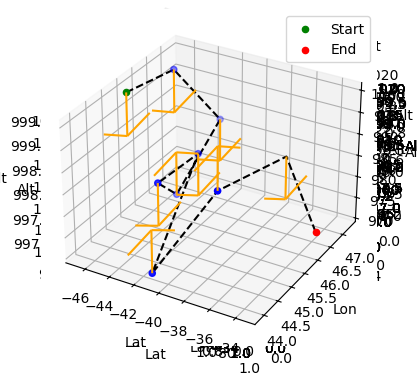

In [116]:
ax = plt.axes(projection='3d')
ax.scatter(idata.prior.Lat.squeeze()[1:-2], idata.prior.Lon.squeeze()[1:-2], idata.prior.Alt.squeeze()[1:-2], color='blue')
ax.scatter(idata.prior.Lat.squeeze()[0], idata.prior.Lon.squeeze()[0], idata.prior.Alt.squeeze()[0], color='green', label='Start')
ax.scatter(idata.prior.Lat.squeeze()[-1], idata.prior.Lon.squeeze()[-1], idata.prior.Alt.squeeze()[-1], color='red', label='End')
ax.plot3D(idata.prior.Lat.squeeze(), idata.prior.Lon.squeeze(), idata.prior.Alt.squeeze(), linestyle='--', color='black')

# Add quiver plot
ax.quiver(idata.prior.Lat.squeeze()[0:-1], idata.prior.Lon.squeeze()[0:-1], idata.prior.Alt.squeeze()[0:-1], 
          arrow_delta_lat, arrow_delta_lat, arrow_delta_alt, 
          color='orange')

ax.set_xlabel("Lat")
ax.set_ylabel("Lon")
ax.set_zlabel("Alt")
ax.legend()
plt.show()

In [109]:
idata

Inference data with groups:
	> prior
	> constant_data